In [1]:
import torch as torch
from sklearn.model_selection import train_test_split
import os
import h5py
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import tqdm as tqdm

## Download the dataset

In [3]:
!pip install gdown

  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata


In [4]:
import gdown

file_id = "130g_RdSuPxhfbxwf61JhT186xcU1uHw3"
output_filename = "processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z"  # Change this to the desired filename

gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", output_filename, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=130g_RdSuPxhfbxwf61JhT186xcU1uHw3
From (redirected): https://drive.google.com/uc?export=download&id=130g_RdSuPxhfbxwf61JhT186xcU1uHw3&confirm=t&uuid=5126c8e4-9580-4c42-9ff4-7e330f68d465
To: /j-jepa-vol/pnnl/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.38G/1.38G [00:19<00:00, 69.9MB/s]


'processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z'

## Dataset exploration

In [5]:
f = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z', 'r')
treeArray = f['t_allpar_new'][()]

features = ['j_zlogz', 'j_c1_b0_mmdt','j_c1_b1_mmdt', 'j_c1_b2_mmdt' , 'j_c2_b1_mmdt',
            'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 
            'j_n2_b2_mmdt', 'j_mass_mmdt', 'j_multiplicity']
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t']
features_labels_df = pd.DataFrame(treeArray, columns = features + labels)
features_labels_df = features_labels_df.drop_duplicates()
features_val = features_labels_df[features].values

labels_val = features_labels_df[labels].values

X_train, X_test, y_train, y_test = train_test_split(features_val,labels_val,test_size = 0.2, random_state = 42)


In [6]:
features_labels_df[features]

,j_zlogz,j_c1_b0_mmdt,j_c1_b1_mmdt,j_c1_b2_mmdt,j_c2_b1_mmdt,j_c2_b2_mmdt,j_d2_b1_mmdt,j_d2_b2_mmdt,j_d2_a1_b1_mmdt,j_d2_a1_b2_mmdt,j_m2_b1_mmdt,j_m2_b2_mmdt,j_n2_b1_mmdt,j_n2_b2_mmdt,j_mass_mmdt,j_multiplicity
0,-3.027986,0.465939,0.048607,0.008048,0.034009,0.002053,0.699683,0.255108,0.699683,0.111289,0.057624,0.014688,0.180873,0.047520,90.517586,38.0
1,-3.149485,0.458240,0.052290,0.013172,0.088799,0.013388,1.698195,1.016423,1.698195,0.160612,0.070419,0.018904,0.279586,0.097993,103.342491,69.0
2,-2.922649,0.455969,0.040164,0.005786,0.030218,0.001580,0.752356,0.272986,0.752356,0.110745,0.061472,0.019364,0.184330,0.050588,79.648407,42.0
3,-2.256488,0.400185,0.009152,0.000282,0.017395,0.000667,1.900810,2.365018,1.900810,0.307912,0.127235,0.071253,0.410510,0.292179,10.513571,33.0
4,-2.914227,0.435764,0.058405,0.014595,0.126756,0.037123,2.170306,2.543523,2.170306,0.245217,0.091513,0.042131,0.377326,0.235774,118.270248,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535393,-1.627757,0.352491,0.001939,0.000012,0.002581,0.000015,1.330612,1.220244,1.330612,0.234310,0.108462,0.068347,0.335752,0.231590,4.752701,12.0
1581989,-1.845163,0.342177,0.002502,0.000023,0.003914,0.000034,1.564704,1.492089,1.564704,0.224847,0.085621,0.042902,0.327416,0.204895,4.538349,21.0
1666527,-0.952561,0.204414,0.002135,0.000024,0.004953,0.000059,2.320268,2.479696,2.320268,0.193878,0.064376,0.047116,0.341516,0.267662,6.395170,9.0
1675112,-1.366061,0.296614,0.002869,0.000030,0.002359,0.000030,0.822408,1.005530,0.822408,0.116742,0.044158,0.027577,0.158895,0.099960,5.156221,16.0


In [7]:
X_train.shape

(78968, 16)

## Initialize DNN model

In [13]:
model = torch.nn.Sequential(
    torch.nn.Linear(16,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,16),
    torch.nn.ReLU(),
    torch.nn.Linear(16,5),
    torch.nn.Softmax()).to('cuda')

In [14]:
model

Sequential(
  (0): Linear(in_features=16, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=5, bias=True)
  (7): Softmax(dim=None)
)

## Configure dataloaders and loss function

In [19]:
learning_rate = 1e-4
X_train = torch.from_numpy(X_train).to('cuda')
y_train = torch.from_numpy(y_train).to('cuda')
dataloader = DataLoader(X_train, batch_size=64, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
ydataloader = DataLoader(y_train, batch_size=64, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)

In [20]:
loss_fn = torch.nn.CrossEntropyLoss()

## Training and eval loop

In [25]:
trainloss = np.zeros(100)
valloss = np.zeros(100)
for t in range(100):
    for x,y in zip(dataloader,ydataloader):
        
        # Forward pass: compute predicted y by passing x to the model. Module objects
        # override the __c|all__ operator so you can call them like functions. When
        # doing so you pass a Tensor of input data to the Module and it produces
        # a Tensor of output data.
        y_pred = model(x.float())

        loss = loss_fn(y_pred, torch.max(y.float(),1)[1])

        # Zero the gradients before running the backward pass.
        model.zero_grad()

        # Backward pass: compute gradient of the loss with respect to all the learnable
        # parameters of the model. Internally, the parameters of each Module are stored
        # in Tensors with requires_grad=True, so this call will compute gradients for
        # all learnable parameters in the model.
        loss.backward()
        trainloss[t] = loss
        # Update the weights using gradient descent. Each parameter is a Tensor, so
        # we can access its gradients like we did before.
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
    y_pred = model(torch.from_numpy(X_test).to('cuda'))
    yloss = loss_fn(y_pred, torch.max(torch.from_numpy(y_test).to('cuda'),1)[1])
    valloss[t] = yloss
    print('Epoch' +' ' +str(t) + ' Train Loss:' +str(trainloss[t]))
    print('        ' + 'Val Loss:' + str(valloss[t]))

    

Epoch 0 Train Loss:1.4753402471542358
        Val Loss:1.5142552852630615
Epoch 1 Train Loss:1.4731563329696655
        Val Loss:1.512204647064209
Epoch 2 Train Loss:1.4714642763137817
        Val Loss:1.5104827880859375
Epoch 3 Train Loss:1.4701162576675415
        Val Loss:1.5089824199676514
Epoch 4 Train Loss:1.4690436124801636
        Val Loss:1.5076249837875366
Epoch 5 Train Loss:1.4681596755981445
        Val Loss:1.506364107131958
Epoch 6 Train Loss:1.4674198627471924
        Val Loss:1.5051592588424683
Epoch 7 Train Loss:1.4667738676071167
        Val Loss:1.503987431526184
Epoch 8 Train Loss:1.4662150144577026
        Val Loss:1.5028318166732788
Epoch 9 Train Loss:1.4657319784164429
        Val Loss:1.5016824007034302
Epoch 10 Train Loss:1.465267300605774
        Val Loss:1.5005393028259277
Epoch 11 Train Loss:1.4648590087890625
        Val Loss:1.4993984699249268
Epoch 12 Train Loss:1.4644849300384521
        Val Loss:1.4982578754425049
Epoch 13 Train Loss:1.4641927480697632


## Evaluation

In [26]:
def learningCurve(trainloss,valloss):
    plt.figure(figsize=(10,8))
    plt.plot(trainloss)
    plt.plot(valloss)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

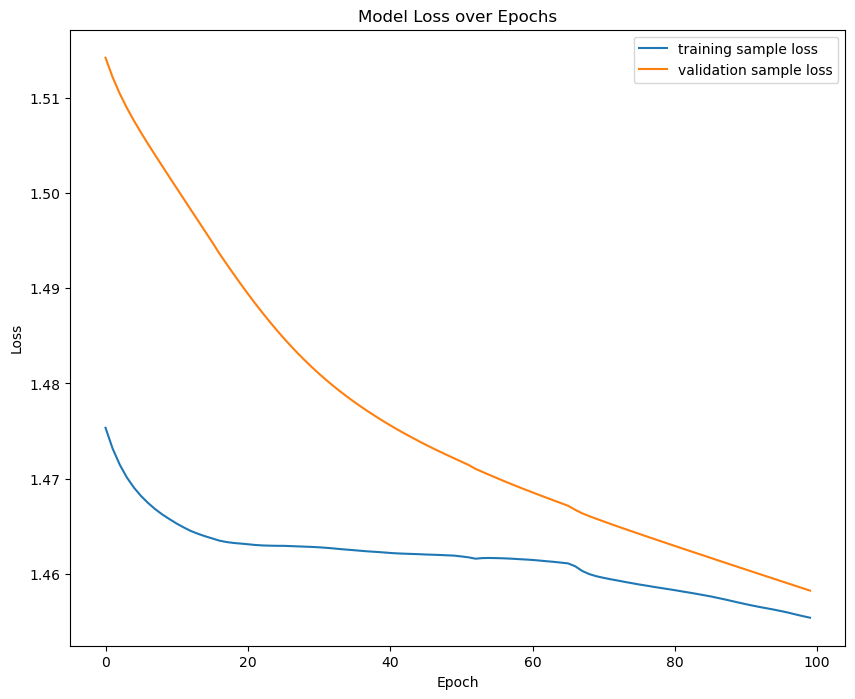

In [27]:
learningCurve(trainloss,valloss)

In [40]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model(torch.from_numpy(features_val).to('cuda')).cpu().detach().numpy()
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    g = labels_pred
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = g[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'DNN ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

/opt/conda/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


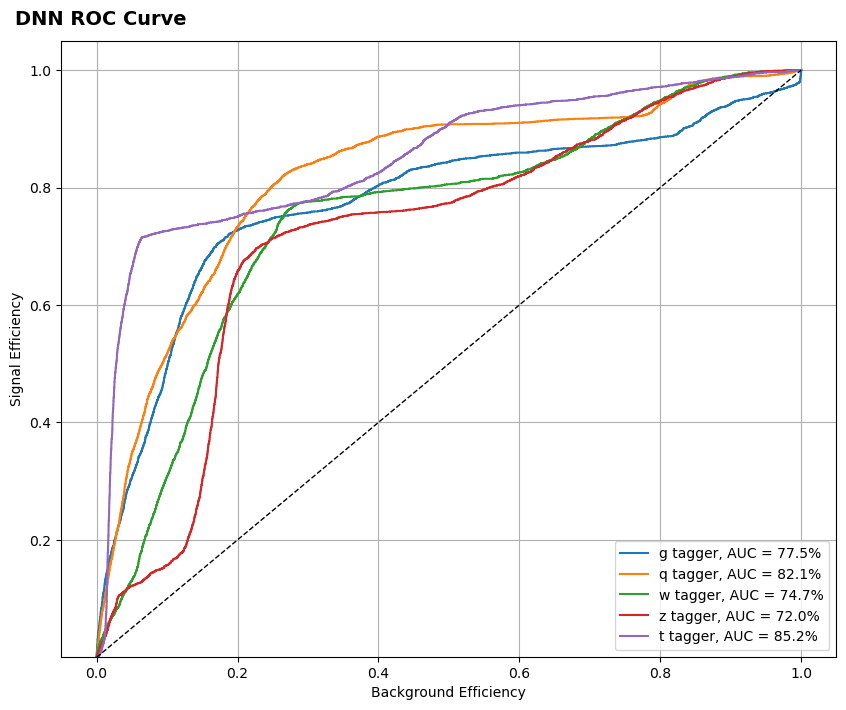

In [41]:
z = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')